# Fraud detection 

Database download link: https://www.kaggle.com/datasets/amanalisiddiqui/fraud-detection-dataset?resource=download

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
import warnings
warnings.filterwarnings("ignore")
#sns.set(style= "whitegrid")

In [52]:
df = pd.read_csv("AIML Dataset.csv")

In [53]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [55]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [56]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [57]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [58]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [59]:
df.shape #showing the rows and columns

(6362620, 11)

In [60]:
#calculates the percentage of fraudulent transactions (isFraud == 1) in the dataset, rounded to 2 decimal places.
round((df["isFraud"].value_counts()[1] / df.shape[0])* 100,2)


0.13

#### Showing the transaction type

chart below shows that data is highly imbalanced in terms of transaction type. 

What this tells us:

##### Most common transaction types:
* CASH_OUT (≈2.24 million) and PAYMENT (≈2.15 million) dominate the dataset.
* Together, they make up the majority of all transactions.

##### Moderate frequency:
* CASH_IN (≈1.40 million) is the third most common.
* Still large, but noticeably less than the top two.

##### Less frequent:
* TRANSFER (≈0.53 million) is much smaller than the first three.

##### Very rare:
* DEBIT (≈41k) is tiny compared to the others — it barely shows up on the bar chart.

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


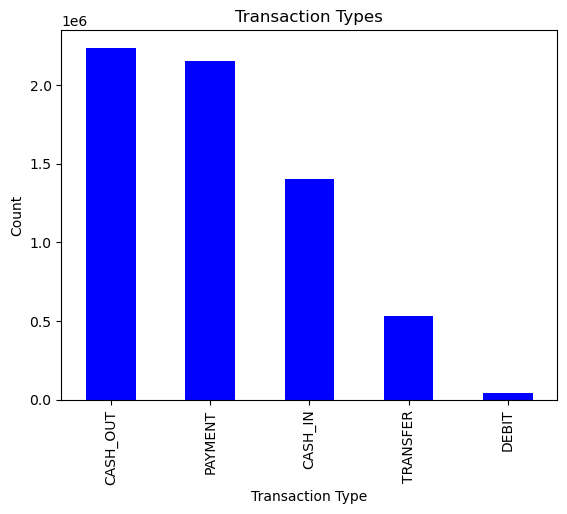

In [61]:
print(df["type"].value_counts())
df["type"].value_counts().plot(kind="bar", title= "Transaction Types", color = "blue")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()
#print(df["type"].value_counts())


#### Graph showing fraud rates by type

##### What the chart shows
* Fraud isn’t spread evenly. It’s concentrated in TRANSFER and CASH_OUT transactions
* TRANSFER transactions have the highest fraud rate, around 0.0078 (≈0.77%).
* CASH_OUT also has some fraud, around 0.0018 (≈0.18%).
* CASH_IN, DEBIT, PAYMENT all have a fraud rate near 0 (no significant fraud).

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


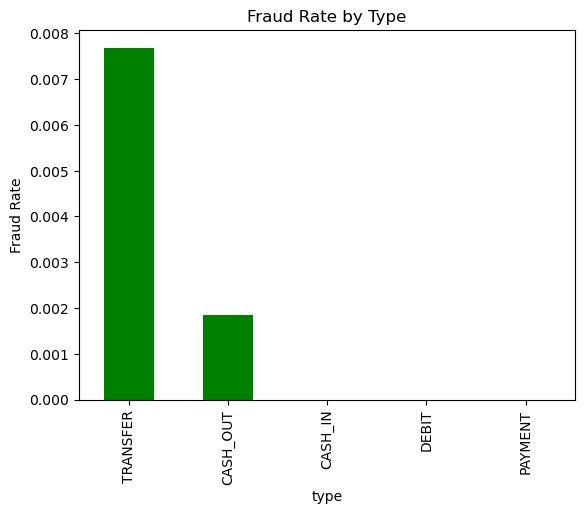

In [62]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False) # grouped dataset by transaction type and taken the mean of isFraud for each group
fraud_by_type.plot(kind="bar", title="Fraud Rate by Type", color="green")
plt.ylabel("Fraud Rate")

print(fraud_by_type)
plt.show()

In [63]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

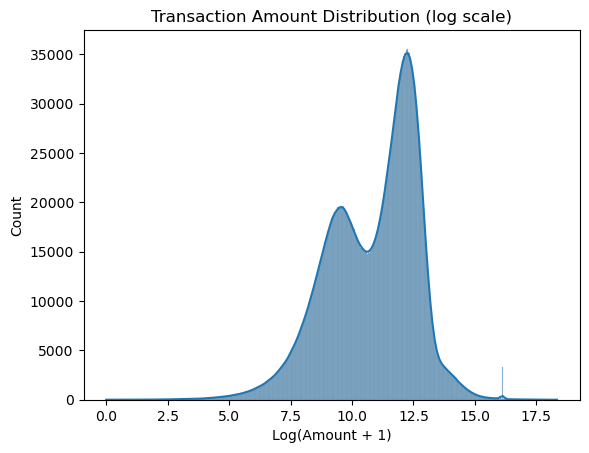

In [64]:
sns.histplot(np.log1p(df["amount"]), bins=1000, kde=True) # np.log1p(x) = log(x + 1) compresses the scale, making the distribution easier to visualize.
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()

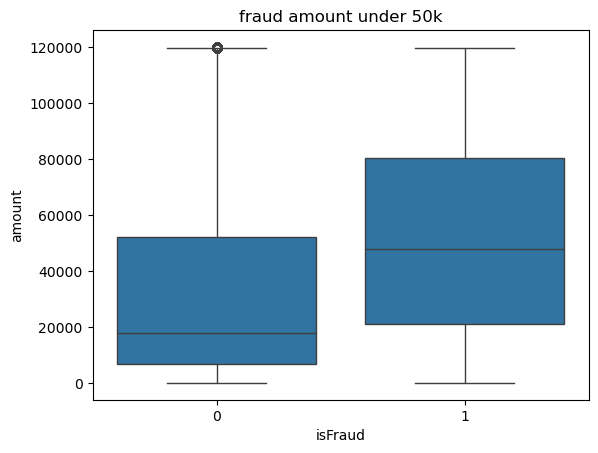

In [65]:
# looking for the relationship with the fraud and amount

sns.boxplot(data = df[df["amount"] < 120000], x = "isFraud", y = "amount")
plt.title("fraud amount under 50k")
plt.show()

In [66]:
# This gives the amount taken out of the origin account. It should equal the transaction amount (unless there’s fraud or inconsistency).
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"] 
# This gives the amount credited to the destination account. Again, it should match the transaction amount (if everything is valid).
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [67]:
print((df["balanceDiffOrig"] < 0).sum())
print((df["balanceDiffDest"] < 0).sum())

1399253
1238864


In [68]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


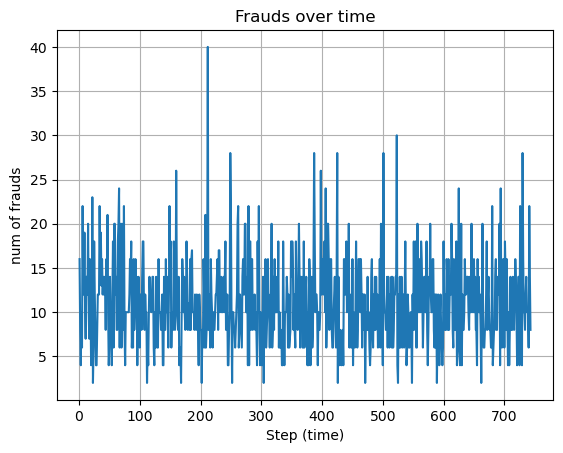

In [69]:
frauds_per_step = df[df["isFraud"] == 1] ["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label = " Frauds per Step")
plt.xlabel("Step (time)")
plt.ylabel("num of frauds")
plt.title("Frauds over time")
plt.grid(True)
plt.show()

In [70]:
df.drop(columns="step", inplace= True)
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [71]:
top_senders = df["nameOrig"].value_counts().head(5)
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
Name: count, dtype: int64

In [72]:
# top_recievers = df[df["isFraud"] == 1] ["nameDest"].value_counts().head(10)
top_recievers = df["nameDest"].value_counts().head(10)
top_recievers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [73]:
#fraud_users = df[df["isFraud"] == 1] ["nameDest"].value_counts().head(10)
fraud_users = df[df["isFraud"] == 1] ["nameOrig"].value_counts().head(10)
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [74]:
fraud_types = df[df["type"].isin(["TRANSFER", "CASH_OUT"])]
fraud_types



,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00,0.00
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,181.00,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,15325.00,46430.44
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,705.00,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,10835.00,2712905.89
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,339682.13,339682.13
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,6311409.28,0.00
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,6311409.28,6311409.27
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,850002.52,0.00


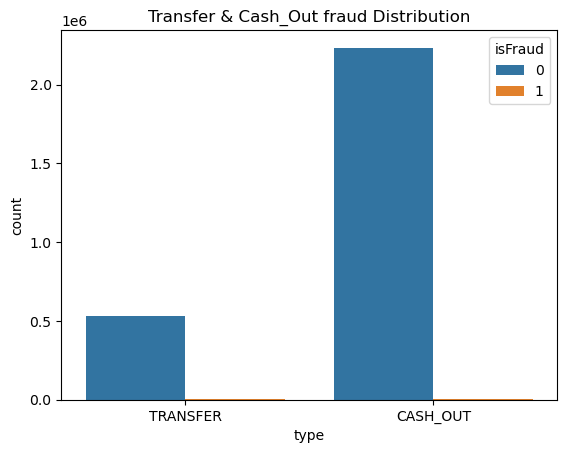

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [75]:
sns.countplot(data=fraud_types, x="type", hue= "isFraud")
plt.title("Transfer & Cash_Out fraud Distribution")
plt.show()
df.head(
    
)

In [76]:
corr = df[["amount","oldbalanceOrg", "newbalanceOrig","oldbalanceDest", "newbalanceDest","isFraud"]].corr()

In [77]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

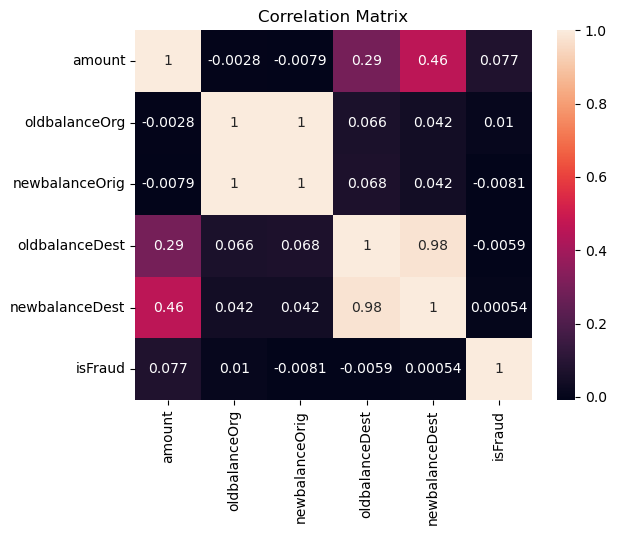

In [78]:
sns.heatmap(corr, annot= True)
plt.title("Correlation Matrix")

## Zero After Transfer


* zero_after_transfer contains transactions where:

* The sender had money before the transaction,

* After the transaction, their balance became exactly 0,

* And the transaction was either a TRANSFER or CASH_OUT.

In [79]:
# filtering the customers

zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0) & 
    (df["type"].isin(["TRANSFER","CASH_OUT"]))]

In [80]:
len(zero_after_transfer)

1188074

In [81]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [82]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [84]:
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1 )

In [85]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [86]:
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg","newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
numeric

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

In [87]:
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis = 1)

In [88]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, stratify=y)

In [89]:
# Below I'm scaling the numeric features, encoding the categorical featuers, and dropping everything else

preprocessor = ColumnTransformer(
    transformers = [
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder = "drop"
)


In [90]:
Pipeline = Pipeline([
    ("prep", preprocessor),
    ("clif", LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [91]:
Pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clif',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [92]:
y_pred = Pipeline.predict(X_test)

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.93      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [94]:
confusion_matrix(y_test,y_pred)

array([[1807574,   98748],
       [    162,    2302]], dtype=int64)

In [99]:
Pipeline.score(X_test,y_test) * 100

94.81817238810427

In [100]:
import joblib

joblib.dump(Pipeline,"fraud_detection_pipeline.pkl")


['fraud_detection_pipeline.pkl']